In [1]:
from pennylane_functions import loss_function, func_and_deriv, u
from pennylane import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

In [5]:
#Set seed:
RANDOM_STATE = 42
seed = np.random.seed(RANDOM_STATE)

epochs = 50
num_qubits = 6
x = np.linspace(0,0.9,20)
l = 5
x0 = 0 
u0 = 1
kappa = 0.1

In [6]:
def training(epochs):
    losses = []
    theta = np.array(2*np.pi*np.random.random(num_qubits*l*3), requires_grad=True)
    for i in range(epochs):
        print("epoch number = ", i)
        loss = loss_function(x,num_qubits,theta, l, i, epochs)
        print("Current loss:", loss)
        losses.append(loss)
        optimizer = qml.AdamOptimizer()
        theta = optimizer.step(lambda theta: loss_function(x,num_qubits,theta, l, i, epochs), theta)
        print("Finished optimizing.")
        print()

    return theta, losses

In [7]:
theta_opt, losses = training(epochs)

#Plot the results
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("With regularization 250 epochs")
plt.savefig("losses_with_regularization_pinned_boundary.png")
plt.show()

f, df = func_and_deriv(x, num_qubits, theta_opt, l)

x2 = np.linspace(0,0.9,100)
u_plot = u(x2, x0, u0, kappa)

plt.plot(x2, u_plot, label="u(x)")
plt.plot(x, f*2-1, label="f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("With regularization 250 epochs")
plt.savefig("f_x_with_regularization_pinned_boundary.png")
plt.show()

epoch number =  0
Current loss: 36.02681156279218
Finished optimizing.

epoch number =  1
Current loss: 23.10594154242166
Finished optimizing.

epoch number =  2
Current loss: 14.65834168866163
Finished optimizing.

epoch number =  3
Current loss: 10.04146262022526
Finished optimizing.

epoch number =  4
Current loss: 6.395531543231648
Finished optimizing.

epoch number =  5
Current loss: 4.0908512267913935
Finished optimizing.

epoch number =  6
Current loss: 3.0961284358748564
Finished optimizing.

epoch number =  7
Current loss: 4.340280246399066
Finished optimizing.

epoch number =  8
Current loss: 2.982054373723572
Finished optimizing.

epoch number =  9
Current loss: 4.216318079321159
Finished optimizing.

epoch number =  10
Current loss: 2.8405961551435297
Finished optimizing.

epoch number =  11
Current loss: 4.021941803078658
Finished optimizing.

epoch number =  12
Current loss: 2.76863007088562
Finished optimizing.

epoch number =  13
Current loss: 3.854057031803401
Finished

KeyboardInterrupt: 

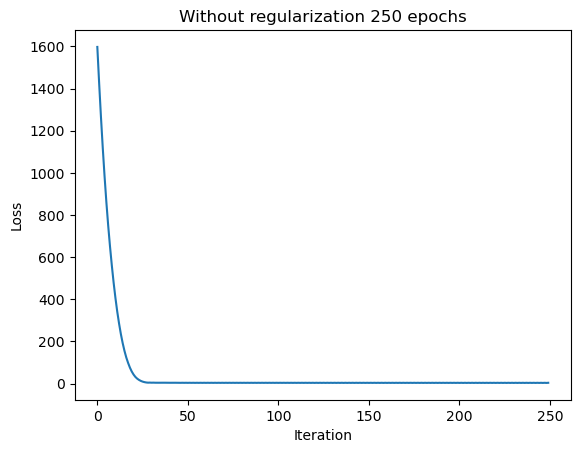

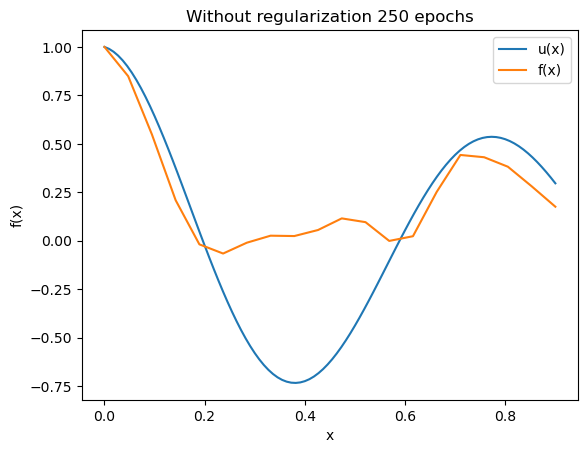

In [5]:
#Plot the results
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Without regularization 250 epochs")
# plt.savefig("losses_without_regularization_floating_boundary.png")
plt.show()

f, df = func_and_deriv(x, num_qubits, theta_opt, l)

x2 = np.linspace(0,0.9,100)
u_plot = u(x2, x0, u0, kappa)

plt.plot(x2, u_plot, label="u(x)")
plt.plot(x, f, label="f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Without regularization 250 epochs")
# plt.savefig("f_x_without_regularization_floating_boundary.png")
plt.show()